In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')

# Load the data
data_path = "../data/raw data/dambulla_daily_vegetable_prices_2010_2025 (1).csv"

# Try different encodings if needed
try:
    df = pd.read_csv(data_path)
    print("Data loaded successfully with default encoding")
except UnicodeDecodeError:
    df = pd.read_csv(data_path, encoding='latin-1')
    print("Data loaded successfully with latin-1 encoding")

print(f"Data shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Data loaded successfully with default encoding
Data shape: (35166, 7)
Memory usage: 8.31 MB


In [2]:
# Display first few rows
print("First 10 rows of the dataset:")
print(df.head(10))
print("\n" + "="*80 + "\n")

# Display basic info
print("Data Information:")
print(df.info())
print("\n" + "="*80 + "\n")

# Check column names
print("Column names:")
print(df.columns.tolist())
print("\n" + "="*80 + "\n")

# Check data types
print("Data types:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

First 10 rows of the dataset:
         Date Vegetable_Name Season  Daily_Arrival_MT  Estimated_Sales_MT  Wholesale_Price_Rs_kg Supply_Status
0  2010-01-01         Carrot   Maha            147.66              110.74                  81.27          High
1  2010-01-02         Carrot   Maha            145.99              109.49                  82.20          High
2  2010-01-03         Carrot   Maha            145.28              108.96                  82.60          High
3  2010-01-04         Carrot   Maha            124.34               93.26                  96.51        Stable
4  2010-01-05         Carrot   Maha            121.98               91.48                  98.38        Stable
5  2010-01-06         Carrot   Maha            136.60              102.45                  87.85        Stable
6  2010-01-07         Carrot   Maha            122.24               91.68                  98.17        Stable
7  2010-01-08         Carrot   Maha            134.17              100.63         

In [3]:
# Basic statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())
print("\n" + "="*80 + "\n")

# For categorical columns
print("Descriptive Statistics for Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top 5 values: {df[col].value_counts().head().to_dict()}")

print("\n" + "="*80 + "\n")

Descriptive Statistics for Numerical Columns:
       Daily_Arrival_MT  Estimated_Sales_MT  Wholesale_Price_Rs_kg
count      35166.000000        35166.000000           35166.000000
mean         108.568116           81.426113              97.036475
std           48.194004           36.145533              32.216638
min           17.390000           13.040000              60.380000
25%           80.312500           60.232500              72.110000
50%          113.210000           84.910000              89.090000
75%          146.970000          110.230000             108.887500
max          198.740000          149.060000             229.990000


Descriptive Statistics for Categorical Columns:

Date:
Unique values: 5861
Top 5 values: {'2010-01-01': 6, '2010-01-02': 6, '2010-01-03': 6, '2010-01-04': 6, '2010-01-05': 6}

Vegetable_Name:
Unique values: 6
Top 5 values: {'Carrot': 5861, 'Cabbage': 5861, 'Tomato': 5861, 'Brinjal': 5861, 'Pumpkin': 5861}

Season:
Unique values: 3
Top 5 values: {'

C:\Users\Arosha IIT\AppData\Local\Temp\ipykernel_16368\1386054418.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


In [4]:
# Check for missing values
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values overall: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

print("\n" + "="*80 + "\n")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Total missing values: 0
Percentage of missing values overall: 0.00%




Original Date dtype: str
First few Date values:
0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
Name: Date, dtype: str

After conversion - Date dtype: datetime64[us]
Failed date conversions: 0

Date range: 2010-01-01 00:00:00 to 2026-01-17 00:00:00
Total days in dataset: 5860 days

Temporal Distribution:

Yearly distribution:
Year
2010    2190
2011    2190
2012    2196
2013    2190
2014    2190
2015    2190
2016    2196
2017    2190
2018    2190
2019    2190
2020    2196
2021    2190
2022    2190
2023    2190
2024    2196
2025    2190
2026     102
Name: count, dtype: int64


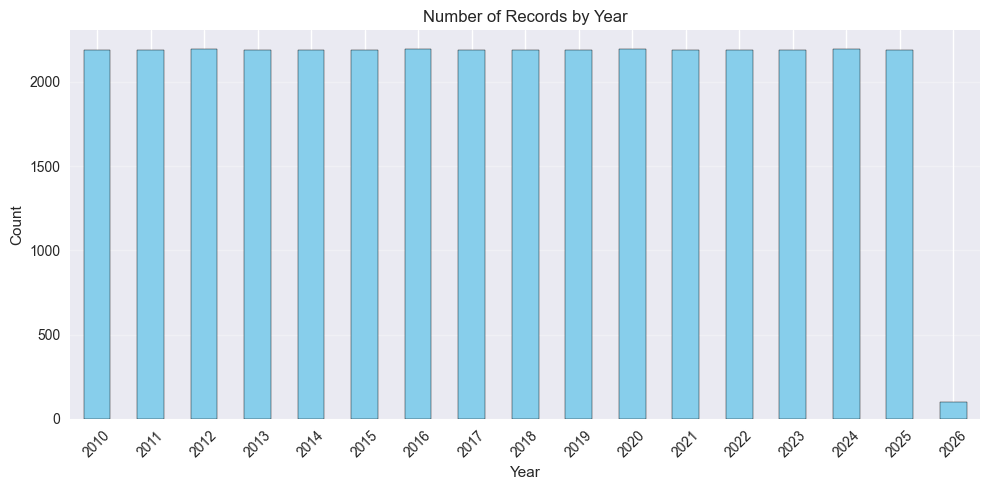


Monthly distribution (across all years):
Month
1     3078
2     2712
3     2976
4     2880
5     2976
6     2880
7     2976
8     2976
9     2880
10    2976
11    2880
12    2976
Name: count, dtype: int64

Monthly distribution with names:
January (1): 3078
February (2): 2712
March (3): 2976
April (4): 2880
May (5): 2976
June (6): 2880
July (7): 2976
August (8): 2976
September (9): 2880
October (10): 2976
November (11): 2880
December (12): 2976


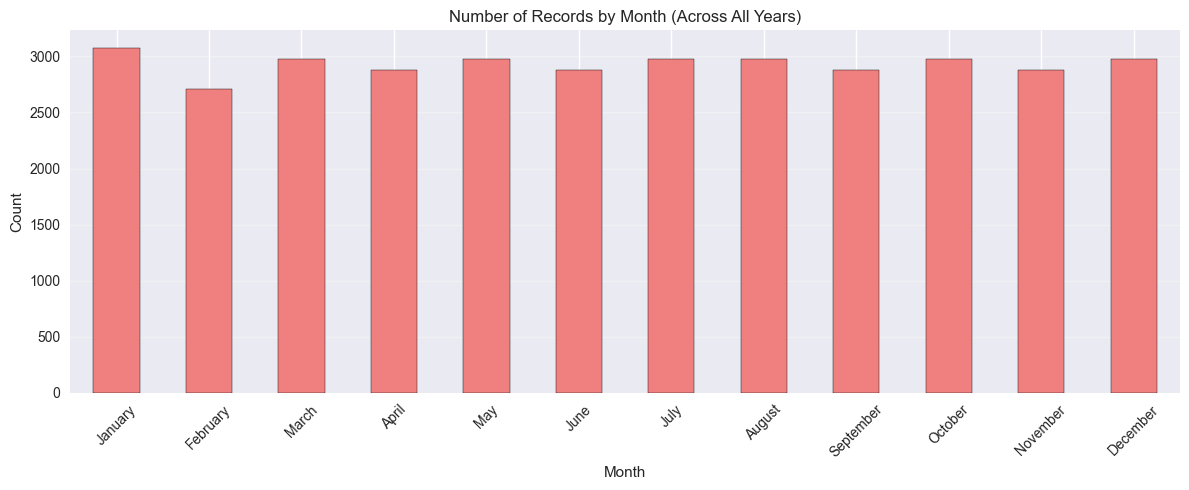


Day of week distribution:
DayOfWeek
Friday       5028
Saturday     5028
Sunday       5022
Monday       5022
Tuesday      5022
Wednesday    5022
Thursday     5022
Name: count, dtype: int64


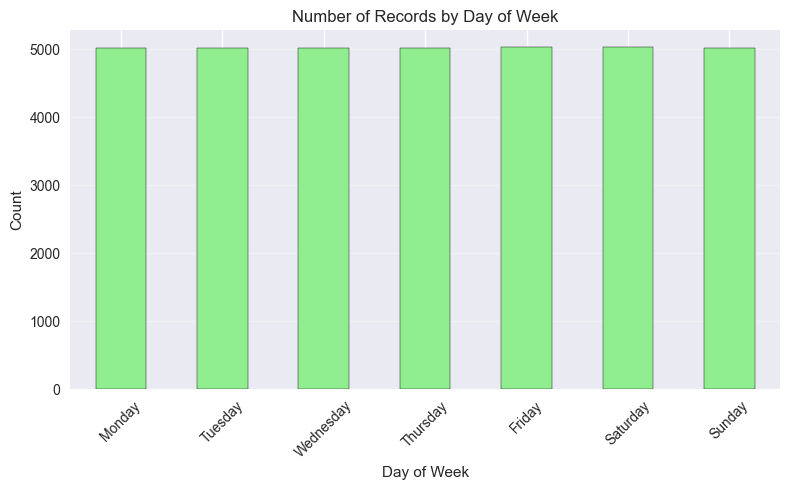


Additional Temporal Insights:

Earliest date: 2010-01-01 00:00:00
Latest date: 2026-01-17 00:00:00
Total unique dates: 5861
Missing dates in the range: 0

Monthly records per year (pivot table):
Month   1    2    3    4    5    6    7    8    9    10   11   12
Year                                                             
2010   186  168  186  180  186  180  186  186  180  186  180  186
2011   186  168  186  180  186  180  186  186  180  186  180  186
2012   186  174  186  180  186  180  186  186  180  186  180  186
2013   186  168  186  180  186  180  186  186  180  186  180  186
2014   186  168  186  180  186  180  186  186  180  186  180  186
2015   186  168  186  180  186  180  186  186  180  186  180  186
2016   186  174  186  180  186  180  186  186  180  186  180  186
2017   186  168  186  180  186  180  186  186  180  186  180  186
2018   186  168  186  180  186  180  186  186  180  186  180  186
2019   186  168  186  180  186  180  186  186  180  186  180  186
2020   186  

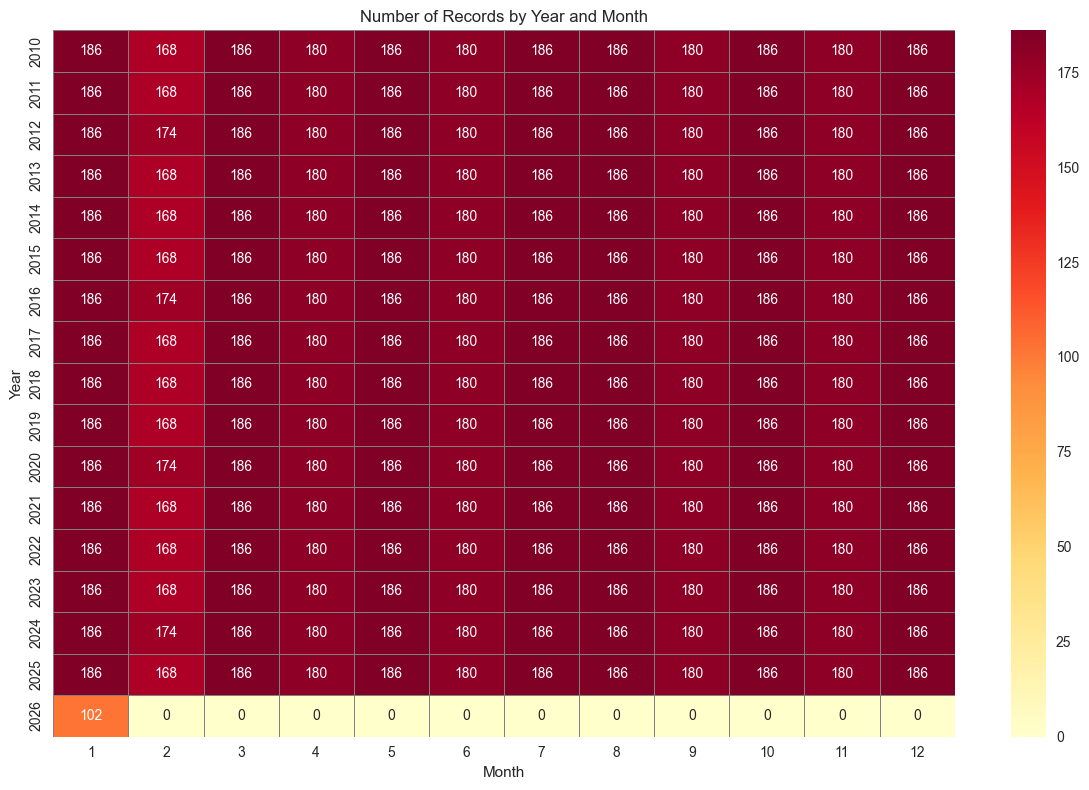

In [5]:
# Convert Date to datetime (your dates are in '2010-01-01' format)
print("Original Date dtype:", df['Date'].dtype)
print("First few Date values:")
print(df['Date'].head())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
print(f"\nAfter conversion - Date dtype: {df['Date'].dtype}")

# Check for any conversion errors
null_dates = df['Date'].isnull().sum()
print(f"Failed date conversions: {null_dates}")
if null_dates > 0:
    print("Sample of rows with invalid dates:")
    print(df[df['Date'].isnull()].head())

# Analyze date range
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days in dataset: {(df['Date'].max() - df['Date'].min()).days} days")

# Create temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['MonthName'] = df['Date'].dt.month_name()

print("\nTemporal Distribution:")
print("\nYearly distribution:")
year_counts = df['Year'].value_counts().sort_index()
print(year_counts)

# Plot yearly distribution
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMonthly distribution (across all years):")
month_counts = df['Month'].value_counts().sort_index()
print(month_counts)

# Map month numbers to names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
print("\nMonthly distribution with names:")
for month_num, count in month_counts.items():
    print(f"{month_names.get(month_num, 'Unknown')} ({month_num}): {count}")

# Plot monthly distribution
plt.figure(figsize=(12, 5))
month_counts.index = month_counts.index.map(lambda x: month_names.get(x, x))
month_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Records by Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDay of week distribution:")
day_counts = df['DayOfWeek'].value_counts()
print(day_counts)

# Reorder days for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)

# Plot day of week distribution
plt.figure(figsize=(8, 5))
day_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Records by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Additional temporal insights
print("\nAdditional Temporal Insights:")
print(f"\nEarliest date: {df['Date'].min()}")
print(f"Latest date: {df['Date'].max()}")
print(f"Total unique dates: {df['Date'].nunique()}")

# Check for date gaps
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
missing_dates = date_range.difference(df['Date'])
print(f"Missing dates in the range: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("Sample of missing dates:")
    print(missing_dates[:10])

# Monthly records per year
print("\nMonthly records per year (pivot table):")
year_month_pivot = pd.crosstab(df['Year'], df['Month'])
print(year_month_pivot)

# Heatmap of records by year and month
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_pivot, annot=True, fmt='d', cmap='YlOrRd',
            linewidths=0.5, linecolor='gray')
plt.title('Number of Records by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

Vegetable Name Analysis:
Total unique vegetables: 6

Top 10 most frequent vegetables:
Vegetable_Name
Carrot          5861
Cabbage         5861
Tomato          5861
Brinjal         5861
Pumpkin         5861
Bitter Gourd    5861
Name: count, dtype: int64

Vegetable distribution (top 15):


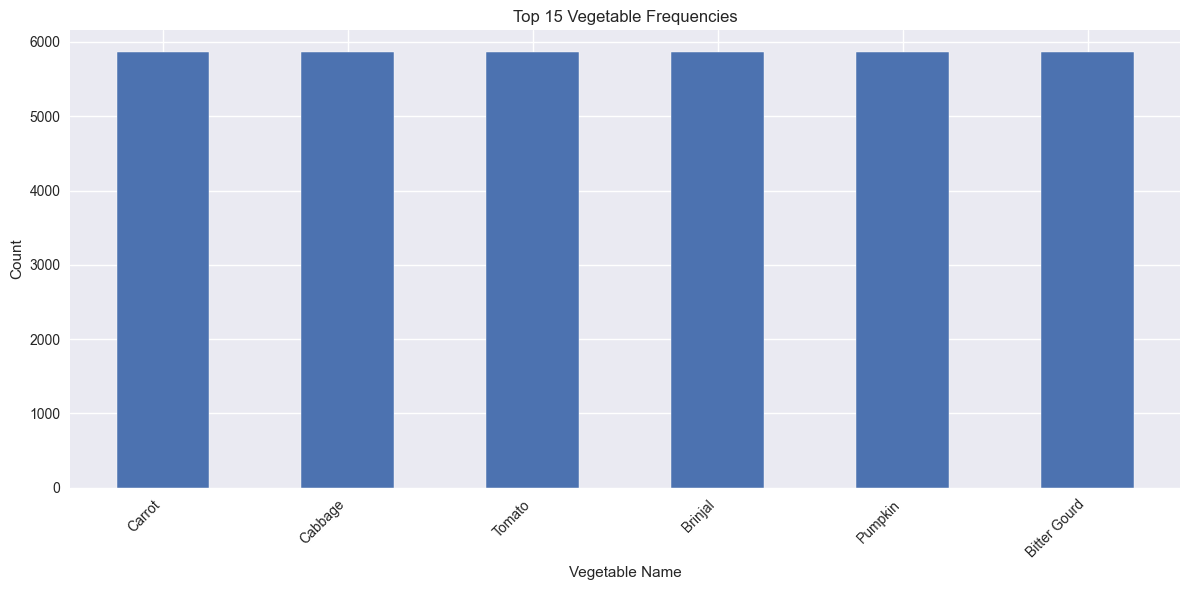


Season Analysis:
Season
Maha          17598
Yala          11808
Off-season     5760
Name: count, dtype: int64

Supply Status Analysis:
Supply_Status
Stable    24695
Low        5760
High       4711
Name: count, dtype: int64




In [6]:
# Analyze Vegetable_Name
print("Vegetable Name Analysis:")
print(f"Total unique vegetables: {df['Vegetable_Name'].nunique()}")
print("\nTop 10 most frequent vegetables:")
print(df['Vegetable_Name'].value_counts().head(10))

print("\nVegetable distribution (top 15):")
plt.figure(figsize=(12, 6))
df['Vegetable_Name'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Vegetable Frequencies')
plt.xlabel('Vegetable Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze Season
print("\nSeason Analysis:")
print(df['Season'].value_counts())

# Analyze Supply_Status
print("\nSupply Status Analysis:")
print(df['Supply_Status'].value_counts())

print("\n" + "="*80 + "\n")

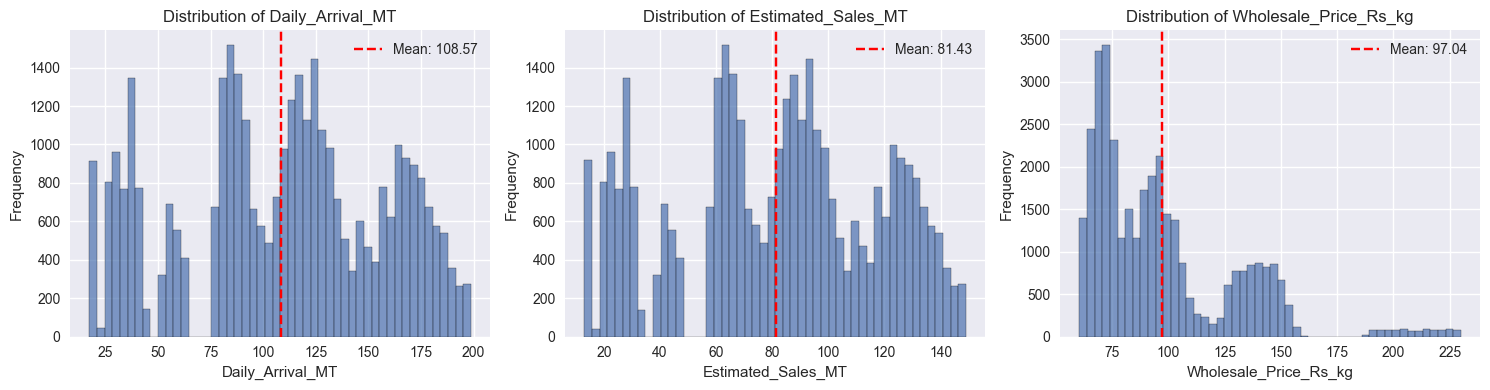

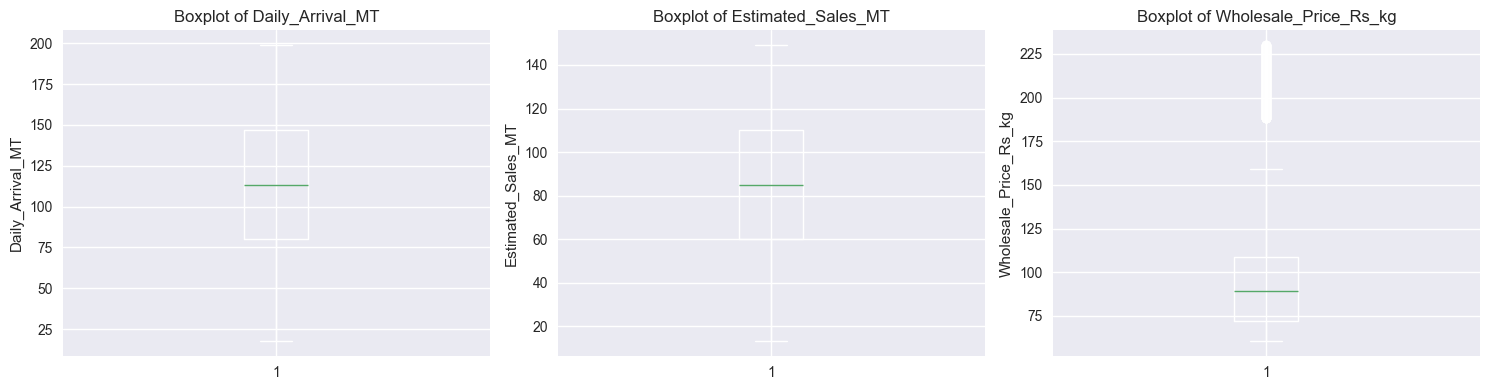

In [7]:
# Select numerical columns
numerical_cols = ['Daily_Arrival_MT', 'Estimated_Sales_MT', 'Wholesale_Price_Rs_kg']

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    # Add vertical line for mean
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Boxplots for outliers detection
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

Correlation Matrix:
                       Daily_Arrival_MT  Estimated_Sales_MT  Wholesale_Price_Rs_kg
Daily_Arrival_MT               1.000000            1.000000              -0.765511
Estimated_Sales_MT             1.000000            1.000000              -0.765512
Wholesale_Price_Rs_kg         -0.765511           -0.765512               1.000000


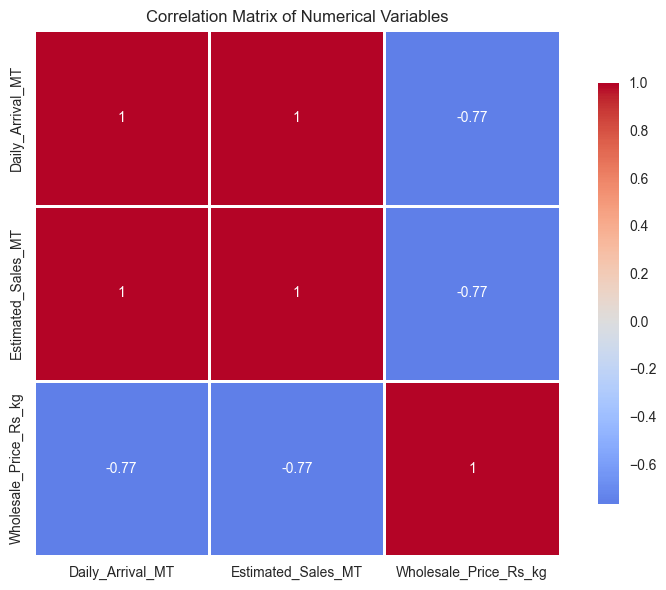

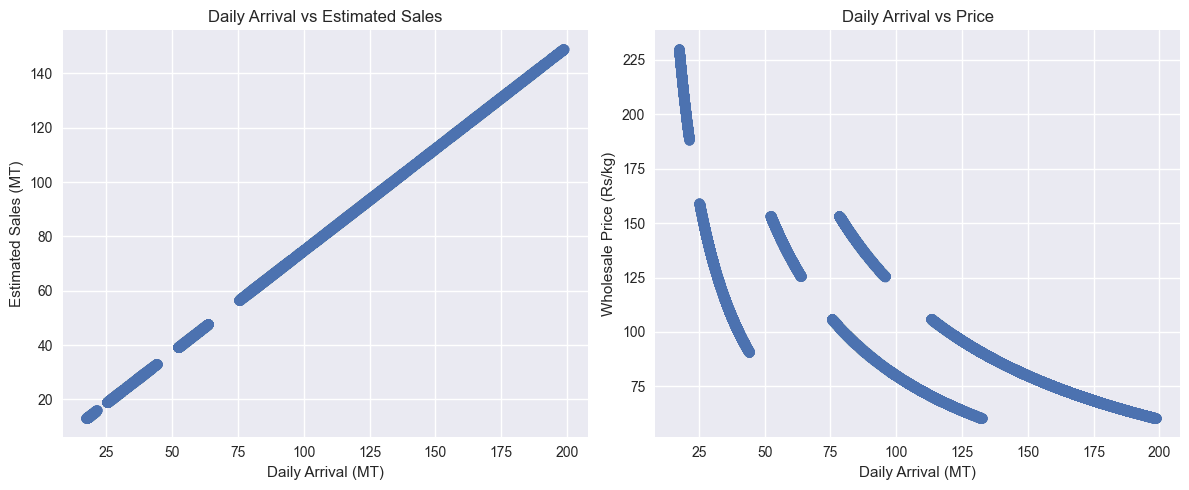

In [8]:
# Calculate correlations between numerical variables
print("Correlation Matrix:")
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Scatter plots for key relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Daily Arrival vs Estimated Sales
axes[0].scatter(df['Daily_Arrival_MT'], df['Estimated_Sales_MT'], alpha=0.5)
axes[0].set_xlabel('Daily Arrival (MT)')
axes[0].set_ylabel('Estimated Sales (MT)')
axes[0].set_title('Daily Arrival vs Estimated Sales')

# Price vs Arrival
axes[1].scatter(df['Daily_Arrival_MT'], df['Wholesale_Price_Rs_kg'], alpha=0.5)
axes[1].set_xlabel('Daily Arrival (MT)')
axes[1].set_ylabel('Wholesale Price (Rs/kg)')
axes[1].set_title('Daily Arrival vs Price')

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

SEASONALITY AND TIME SERIES ANALYSIS
Date column dtype: datetime64[us]
Converted Date to datetime64[ns]

Aggregating data by month...

Monthly aggregated data shape: (193, 16)

First few rows of monthly aggregated data:
   Year  Month  Arrival_Mean  Arrival_Sum  Arrival_Std  Arrival_Min  Arrival_Max  Sales_Mean  Sales_Sum  Sales_Std  Sales_Min  Sales_Max  Price_Mean  Price_Std  Price_Min  Price_Max
0  2010      1    142.715323     26545.05    32.823384        78.33       198.38  107.036237   19908.74  24.617553      58.75     148.78   89.593656  24.796275      60.49     153.20
1  2010      2    142.805298     23991.29    33.221736        78.27       197.66  107.103750   17993.43  24.916269      58.70     148.24   89.708750  25.339674      60.71     153.32
2  2010      3    143.152312     26626.33    33.236183        78.93       197.08  107.364516   19969.80  24.927231      59.20     147.81   89.447634  25.070627      60.89     152.03
3  2010      4     31.871444      5736.86     7.4213

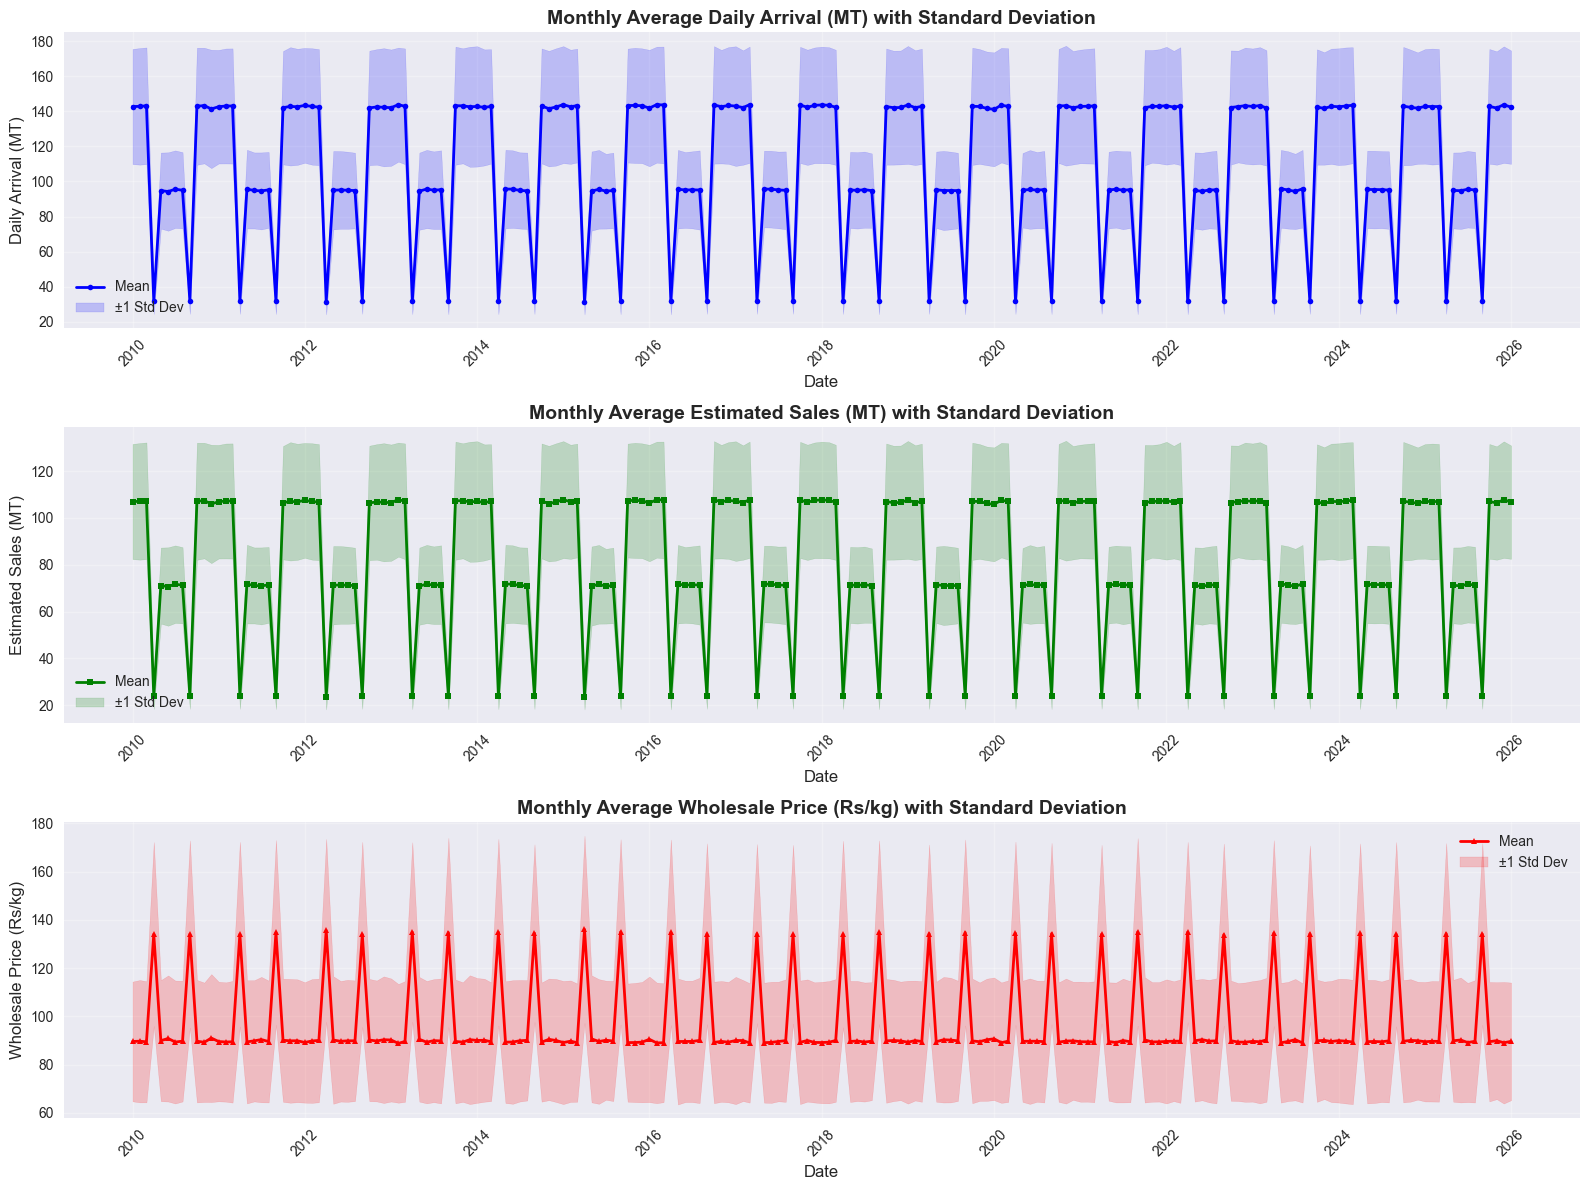


SEASONAL ANALYSIS BY MONTH

Average values by month (across all years):
   Month_Name  Avg_Arrival_MT  Avg_Sales_MT  Avg_Price_Rs_kg
0     January          142.77        107.08            89.72
1    February          142.90        107.17            89.55
2       March          142.92        107.19            89.56
3       April           31.71         23.78           134.59
4         May           95.17         71.38            89.71
5        June           95.14         71.36            89.76
6        July           95.02         71.27            89.79
7      August           95.09         71.32            89.73
8   September           31.76         23.82           134.39
9     October          142.79        107.09            89.67
10   November          142.54        106.90            89.72
11   December          142.59        106.94            89.79


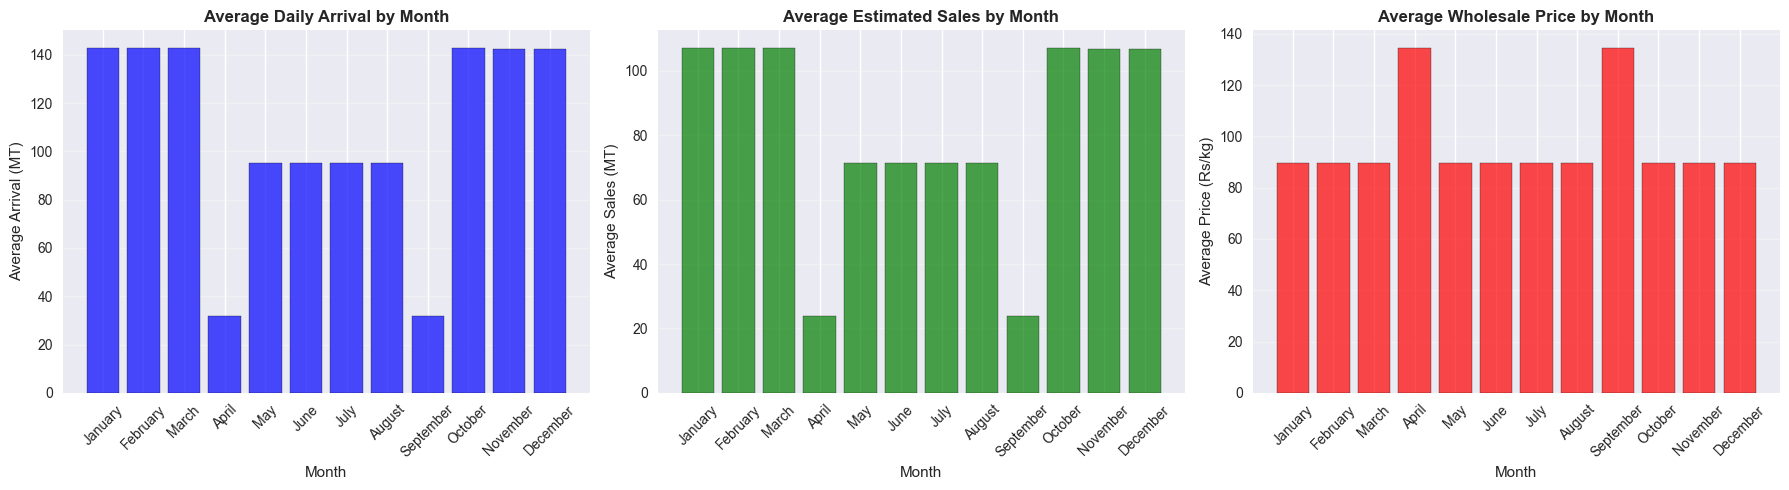


YEAR-OVER-YEAR COMPARISON

Average values by year:
    Year  Avg_Arrival_MT  Avg_Sales_MT  Avg_Price_Rs_kg
0   2010          108.37         81.28            97.13
1   2011          108.40         81.30            97.09
2   2012          108.38         81.29            97.25
3   2013          108.52         81.39            97.16
4   2014          108.33         81.25            97.17
5   2015          108.56         81.42            97.12
6   2016          108.79         81.59            96.92
7   2017          108.67         81.50            96.85
8   2018          108.40         81.30            97.02
9   2019          108.33         81.25            97.17
10  2020          108.49         81.37            97.02
11  2021          108.48         81.36            96.96
12  2022          108.39         81.29            97.08
13  2023          108.36         81.27            97.03
14  2024          108.58         81.43            97.01
15  2025          108.46         81.34            96

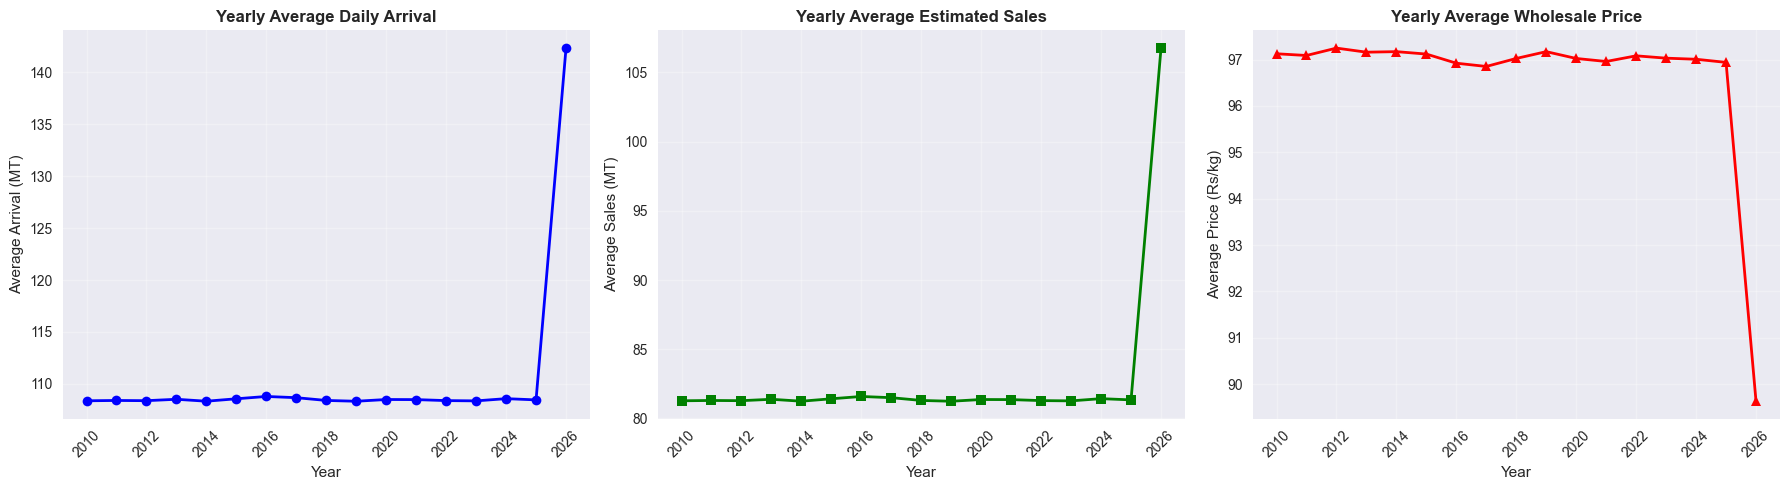


TIME SERIES SUMMARY STATISTICS

Overall trends (2010-2024):
Arrival - Mean: 108.54 MT, Range: 31.40 to 143.80 MT
Sales   - Mean: 81.41 MT, Range: 23.55 to 107.85 MT
Price   - Mean: 97.13 Rs/kg, Range: 88.80 to 136.01 Rs/kg

Year-over-Year Percentage Changes (where available):
2011: Arrival: +0.0%, Sales: +0.0%, Price: -0.0%
2012: Arrival: -0.0%, Sales: -0.0%, Price: +0.2%
2013: Arrival: +0.1%, Sales: +0.1%, Price: -0.1%
2014: Arrival: -0.2%, Sales: -0.2%, Price: +0.0%
2015: Arrival: +0.2%, Sales: +0.2%, Price: -0.1%
2016: Arrival: +0.2%, Sales: +0.2%, Price: -0.2%
2017: Arrival: -0.1%, Sales: -0.1%, Price: -0.1%
2018: Arrival: -0.2%, Sales: -0.2%, Price: +0.2%
2019: Arrival: -0.1%, Sales: -0.1%, Price: +0.2%
2020: Arrival: +0.2%, Sales: +0.2%, Price: -0.2%
2021: Arrival: -0.0%, Sales: -0.0%, Price: -0.1%
2022: Arrival: -0.1%, Sales: -0.1%, Price: +0.1%
2023: Arrival: -0.0%, Sales: -0.0%, Price: -0.1%
2024: Arrival: +0.2%, Sales: +0.2%, Price: -0.0%
2025: Arrival: -0.1%, Sales: -0.1%, 

In [9]:
print("SEASONALITY AND TIME SERIES ANALYSIS")
print("="*80)

# Check if Date column exists and is datetime
if 'Date' in df.columns:
    print(f"Date column dtype: {df['Date'].dtype}")

    # Ensure Date is datetime
    if df['Date'].dtype != 'datetime64[ns]':
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
        print(f"Converted Date to datetime64[ns]")

    # Check if we have Year and Month columns from previous chunk
    if 'Year' not in df.columns or 'Month' not in df.columns:
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        print(f"Created Year and Month columns")

    # Aggregate data by month for overview
    print("\nAggregating data by month...")
    monthly_data = df.groupby(['Year', 'Month']).agg({
        'Daily_Arrival_MT': ['mean', 'sum', 'std', 'min', 'max'],
        'Estimated_Sales_MT': ['mean', 'sum', 'std', 'min', 'max'],
        'Wholesale_Price_Rs_kg': ['mean', 'std', 'min', 'max']
    }).reset_index()

    # Flatten column names
    monthly_data.columns = ['Year', 'Month',
                            'Arrival_Mean', 'Arrival_Sum', 'Arrival_Std', 'Arrival_Min', 'Arrival_Max',
                            'Sales_Mean', 'Sales_Sum', 'Sales_Std', 'Sales_Min', 'Sales_Max',
                            'Price_Mean', 'Price_Std', 'Price_Min', 'Price_Max']

    print(f"\nMonthly aggregated data shape: {monthly_data.shape}")
    print("\nFirst few rows of monthly aggregated data:")
    print(monthly_data.head())

    # Create datetime index for plotting
    monthly_data['YearMonth'] = pd.to_datetime(
        monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str).str.zfill(2),
        format='%Y-%m'
    )

    # Sort by date
    monthly_data = monthly_data.sort_values('YearMonth')

    # Plot time series
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))

    # Plot 1: Daily Arrival (MT)
    axes[0].plot(monthly_data['YearMonth'], monthly_data['Arrival_Mean'],
                 marker='o', markersize=4, linewidth=2, color='blue', label='Mean')
    axes[0].fill_between(monthly_data['YearMonth'],
                         monthly_data['Arrival_Mean'] - monthly_data['Arrival_Std'],
                         monthly_data['Arrival_Mean'] + monthly_data['Arrival_Std'],
                         alpha=0.2, color='blue', label='±1 Std Dev')
    axes[0].set_title('Monthly Average Daily Arrival (MT) with Standard Deviation', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Date', fontsize=12)
    axes[0].set_ylabel('Daily Arrival (MT)', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)

    # Plot 2: Estimated Sales (MT)
    axes[1].plot(monthly_data['YearMonth'], monthly_data['Sales_Mean'],
                 marker='s', markersize=4, linewidth=2, color='green', label='Mean')
    axes[1].fill_between(monthly_data['YearMonth'],
                         monthly_data['Sales_Mean'] - monthly_data['Sales_Std'],
                         monthly_data['Sales_Mean'] + monthly_data['Sales_Std'],
                         alpha=0.2, color='green', label='±1 Std Dev')
    axes[1].set_title('Monthly Average Estimated Sales (MT) with Standard Deviation', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].set_ylabel('Estimated Sales (MT)', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=45)

    # Plot 3: Wholesale Price (Rs/kg)
    axes[2].plot(monthly_data['YearMonth'], monthly_data['Price_Mean'],
                 marker='^', markersize=4, linewidth=2, color='red', label='Mean')
    axes[2].fill_between(monthly_data['YearMonth'],
                         monthly_data['Price_Mean'] - monthly_data['Price_Std'],
                         monthly_data['Price_Mean'] + monthly_data['Price_Std'],
                         alpha=0.2, color='red', label='±1 Std Dev')
    axes[2].set_title('Monthly Average Wholesale Price (Rs/kg) with Standard Deviation', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Date', fontsize=12)
    axes[2].set_ylabel('Wholesale Price (Rs/kg)', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Additional analysis: Seasonal patterns
    print("\n" + "="*80)
    print("SEASONAL ANALYSIS BY MONTH")
    print("="*80)

    # Calculate average by month across all years
    seasonal_pattern = df.groupby('Month').agg({
        'Daily_Arrival_MT': 'mean',
        'Estimated_Sales_MT': 'mean',
        'Wholesale_Price_Rs_kg': 'mean'
    }).reset_index()

    seasonal_pattern = seasonal_pattern.rename(columns={
        'Daily_Arrival_MT': 'Avg_Arrival_MT',
        'Estimated_Sales_MT': 'Avg_Sales_MT',
        'Wholesale_Price_Rs_kg': 'Avg_Price_Rs_kg'
    })

    # Add month names
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    seasonal_pattern['Month_Name'] = seasonal_pattern['Month'].map(month_names)

    print("\nAverage values by month (across all years):")
    print(seasonal_pattern[['Month_Name', 'Avg_Arrival_MT', 'Avg_Sales_MT', 'Avg_Price_Rs_kg']].round(2))

    # Plot seasonal patterns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Arrival by month
    axes[0].bar(seasonal_pattern['Month_Name'], seasonal_pattern['Avg_Arrival_MT'],
                color='blue', alpha=0.7, edgecolor='black')
    axes[0].set_title('Average Daily Arrival by Month', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Average Arrival (MT)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

    # Sales by month
    axes[1].bar(seasonal_pattern['Month_Name'], seasonal_pattern['Avg_Sales_MT'],
                color='green', alpha=0.7, edgecolor='black')
    axes[1].set_title('Average Estimated Sales by Month', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Average Sales (MT)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

    # Price by month
    axes[2].bar(seasonal_pattern['Month_Name'], seasonal_pattern['Avg_Price_Rs_kg'],
                color='red', alpha=0.7, edgecolor='black')
    axes[2].set_title('Average Wholesale Price by Month', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Average Price (Rs/kg)')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Year-over-Year comparison
    print("\n" + "="*80)
    print("YEAR-OVER-YEAR COMPARISON")
    print("="*80)

    # Calculate average by year
    yearly_data = df.groupby('Year').agg({
        'Daily_Arrival_MT': 'mean',
        'Estimated_Sales_MT': 'mean',
        'Wholesale_Price_Rs_kg': 'mean'
    }).reset_index()

    yearly_data = yearly_data.rename(columns={
        'Daily_Arrival_MT': 'Avg_Arrival_MT',
        'Estimated_Sales_MT': 'Avg_Sales_MT',
        'Wholesale_Price_Rs_kg': 'Avg_Price_Rs_kg'
    })

    print("\nAverage values by year:")
    print(yearly_data.round(2))

    # Plot year-over-year comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Yearly Arrival
    axes[0].plot(yearly_data['Year'], yearly_data['Avg_Arrival_MT'],
                 marker='o', linewidth=2, color='blue')
    axes[0].set_title('Yearly Average Daily Arrival', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Average Arrival (MT)')
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)

    # Yearly Sales
    axes[1].plot(yearly_data['Year'], yearly_data['Avg_Sales_MT'],
                 marker='s', linewidth=2, color='green')
    axes[1].set_title('Yearly Average Estimated Sales', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Average Sales (MT)')
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)

    # Yearly Price
    axes[2].plot(yearly_data['Year'], yearly_data['Avg_Price_Rs_kg'],
                 marker='^', linewidth=2, color='red')
    axes[2].set_title('Yearly Average Wholesale Price', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Average Price (Rs/kg)')
    axes[2].grid(True, alpha=0.3)
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("\n" + "="*80)
    print("TIME SERIES SUMMARY STATISTICS")
    print("="*80)

    print(f"\nOverall trends (2010-2024):")
    print(f"Arrival - Mean: {monthly_data['Arrival_Mean'].mean():.2f} MT, Range: {monthly_data['Arrival_Mean'].min():.2f} to {monthly_data['Arrival_Mean'].max():.2f} MT")
    print(f"Sales   - Mean: {monthly_data['Sales_Mean'].mean():.2f} MT, Range: {monthly_data['Sales_Mean'].min():.2f} to {monthly_data['Sales_Mean'].max():.2f} MT")
    print(f"Price   - Mean: {monthly_data['Price_Mean'].mean():.2f} Rs/kg, Range: {monthly_data['Price_Mean'].min():.2f} to {monthly_data['Price_Mean'].max():.2f} Rs/kg")

    # Calculate year-over-year changes
    yearly_data['Arrival_Change'] = yearly_data['Avg_Arrival_MT'].pct_change() * 100
    yearly_data['Sales_Change'] = yearly_data['Avg_Sales_MT'].pct_change() * 100
    yearly_data['Price_Change'] = yearly_data['Avg_Price_Rs_kg'].pct_change() * 100

    print("\nYear-over-Year Percentage Changes (where available):")
    for idx, row in yearly_data.iterrows():
        if idx > 0:  # Skip first year
            print(f"{int(row['Year'])}: Arrival: {row['Arrival_Change']:+.1f}%, Sales: {row['Sales_Change']:+.1f}%, Price: {row['Price_Change']:+.1f}%")

else:
    print("Date column not found in the dataset")

print("\n" + "="*80 + "\n")

Statistics by Supply Status:

Daily_Arrival_MT by Supply Status:
                     mean  median        std    min     max
Supply_Status                                              
High           153.633974  167.76  34.294965  90.38  198.74
Low             31.734583   32.66   7.303193  17.39   44.15
Stable         117.892104  116.60  34.919666  52.17  188.06

Estimated_Sales_MT by Supply Status:
                     mean  median        std    min     max
Supply_Status                                              
High           115.225527  125.82  25.721231  67.78  149.06
Low             23.800960   24.49   5.477401  13.04   33.11
Stable          88.419101   87.45  26.189800  39.13  141.05

Wholesale_Price_Rs_kg by Supply Status:
                     mean   median        std    min     max
Supply_Status                                               
High            83.073118   71.530  22.803302  60.38  132.78
Low            134.487892  122.475  37.820983  90.59  229.99
Stable      

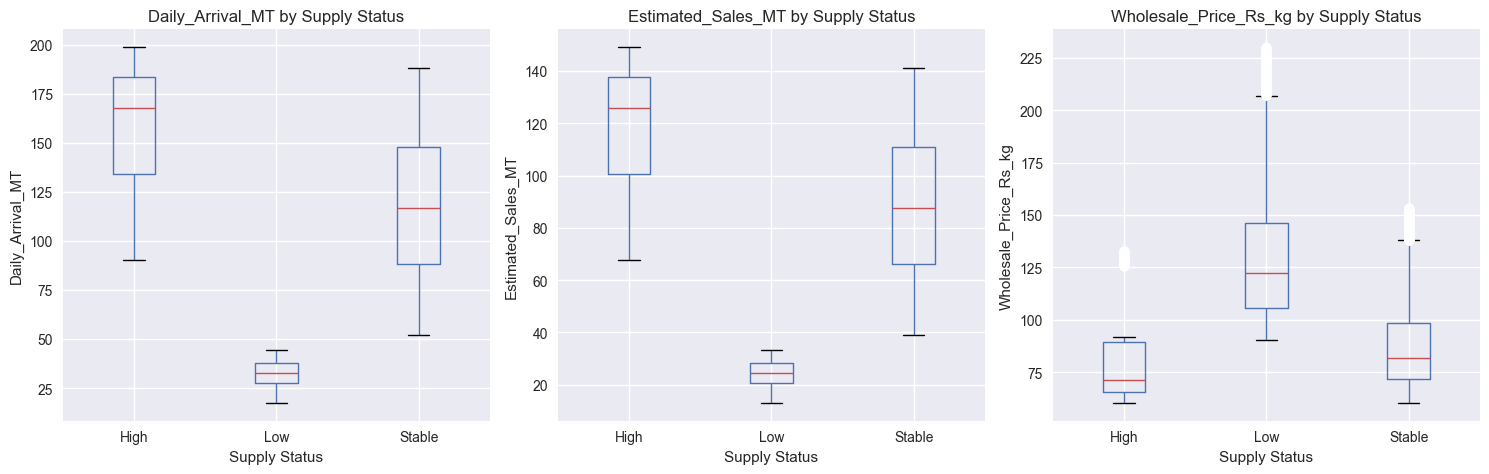

In [10]:
# Analyze numerical variables by Supply_Status
print("Statistics by Supply Status:")
if 'Supply_Status' in df.columns:
    for col in numerical_cols:
        print(f"\n{col} by Supply Status:")
        stats_by_status = df.groupby('Supply_Status')[col].agg(['mean', 'median', 'std', 'min', 'max'])
        print(stats_by_status)

    # Boxplots by Supply Status
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for idx, col in enumerate(numerical_cols):
        df.boxplot(column=col, by='Supply_Status', ax=axes[idx])
        axes[idx].set_title(f'{col} by Supply Status')
        axes[idx].set_ylabel(col)
        axes[idx].set_xlabel('Supply Status')

    plt.suptitle('')
    plt.tight_layout()
    plt.show()

print("\n" + "="*80 + "\n")

In [11]:
# Check for duplicate rows
print("Duplicate Analysis:")
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")
print(f"Percentage of duplicates: {(total_duplicates / len(df)) * 100:.2f}%")

# Check for duplicate dates per vegetable (if applicable)
if 'Date' in df.columns and 'Vegetable_Name' in df.columns:
    date_veg_duplicates = df.duplicated(subset=['Date', 'Vegetable_Name']).sum()
    print(f"\nDuplicate Date-Vegetable combinations: {date_veg_duplicates}")
    if date_veg_duplicates > 0:
        print("\nSample duplicate entries:")
        duplicates = df[df.duplicated(subset=['Date', 'Vegetable_Name'], keep=False)]
        print(duplicates.head(10))

print("\n" + "="*80 + "\n")

Duplicate Analysis:
Total duplicate rows: 0
Percentage of duplicates: 0.00%

Duplicate Date-Vegetable combinations: 0


